<a href="https://colab.research.google.com/github/dangcaptkd/CS114.K21-/blob/master/lab06_my_first_machine_learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"quyennguyenthinh","key":"52c200c7cee98c6a1dd7c6433c61afd8"}'}

In [3]:
!ls -lha kaggle.json
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

-rw-r--r-- 1 root root 72 Jun  3 02:36 kaggle.json


Glass là 1 loại dữ liệu từ các nguyên tố hóa học: RI, Na, Mg, Al... từ đó xác định loại của thủy tinh. Ở data này các loại của thủy tinh chỉ được thể hiện qua các type từ 1 đến 9.

In [4]:
!kaggle datasets download -d uciml/glass

  0% 0.00/3.42k [00:00<?, ?B/s]
100% 3.42k/3.42k [00:00<00:00, 2.98MB/s]


In [6]:
!unzip glass

Archive:  glass.zip
  inflating: glass.csv               


In [34]:
import pandas as pd
data = pd.read_csv('glass.csv')
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [12]:
print(data.groupby('Type').size())

Type
1    70
2    76
3    17
5    13
6     9
7    29
dtype: int64


Thấy được số lượng của các type không đều, nên phải data bằng tay thì mới có thể cân bằng giữa data dùng để train và test. Nhưng lười quá :))

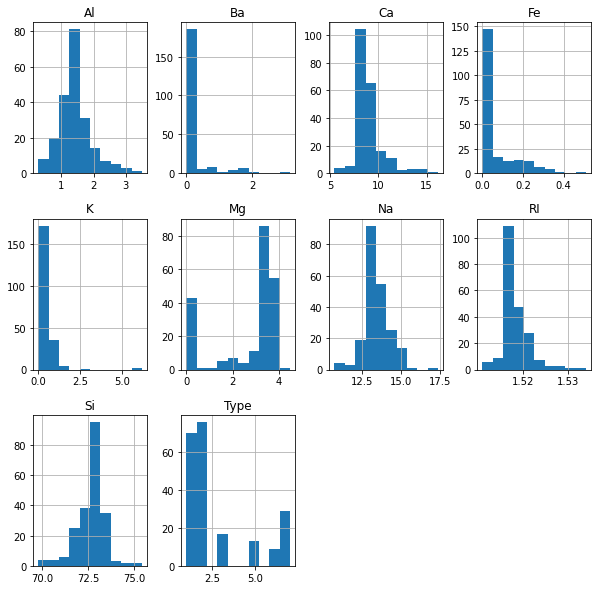

In [38]:
data.hist(figsize=(10,10),layout=(3,4))
plt.show()

In [36]:
d = data.values
features = d[:,:9]
labels = d[:,9]
print(features.shape)
print(labels.shape)

(214, 9)
(214,)


In [0]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

In [50]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
pred = model.predict(x_test)
print('acc:', accuracy_score(y_test, pred))

acc: 0.7209302325581395
